In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
import itertools

%matplotlib inline

# How Much is Your Car Worth?

Data about the retail price of 2005 General Motors cars can be found in `car_data.csv`.

The columns are:

1. Price: suggested retail price of the used 2005 GM car in excellent condition.
2. Mileage: number of miles the car has been driven
3. Make: manufacturer of the car such as Saturn, Pontiac, and Chevrolet
4. Model: specific models for each car manufacturer such as Ion, Vibe, Cavalier
5. Trim (of car): specific type of car model such as SE Sedan 4D, Quad Coupe 2D          
6. Type: body type such as sedan, coupe, etc.      
7. Cylinder: number of cylinders in the engine        
8. Liter: a more specific measure of engine size     
9. Doors: number of doors           
10. Cruise: indicator variable representing whether the car has cruise control (1 = cruise)
11. Sound: indicator variable representing whether the car has upgraded speakers (1 = upgraded)
12. Leather: indicator variable representing whether the car has leather seats (1 = leather)

## Tasks, Part 1

1. Find the linear regression equation for mileage vs price.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

## Tasks, Part 2

1. Use mileage, cylinders, liters, doors, cruise, sound, and leather to find the linear regression equation.
2. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
3. Find the combination of the factors that is the best predictor for price.

## Tasks, Part 3

1. Research dummy variables in scikit-learn to see how to use the make, model, and body type.
2. Find the best combination of factors to predict price.

In [4]:
df = pd.read_csv("car_data.csv")

### Part 1

##### Find the linear regression equation for mileage vs price.

In [5]:
in1 = np.array(df[['Mileage']])
out1 = np.array(df[['Price']])
regr1 = linear_model.LinearRegression()
regr1.fit(in1, out1)
print('Price', regr1.coef_, '* Mileage +', regr1.intercept_)

Price [[-0.1725205]] * Mileage + [ 24764.55900606]


##### Chart the original data and the equation on the chart.

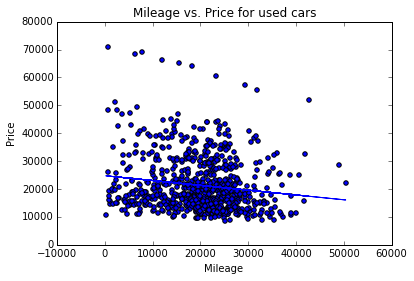

In [6]:
plt.scatter(in1, out1)
plt.plot(in1, regr1.predict(in1))
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.title('Mileage vs. Price for used cars')
plt.show()

##### Find the equation's $R^2$ score (use the `.score` method) to determine whether the equation is a good fit for this data.

In [7]:
regr1.score(in1, out1)

0.020463447323489481

Mileage by itself is not a good correlation for Price

### Part 2

##### Use mileage, cylinders, liters, doors, cruise, sound, and leather to find the linear regression equation.

In [8]:
cols = ['Mileage', 'Cylinder', 'Liter', 'Doors', 'Cruise', 'Sound', 'Leather']
in2 = np.array(df[cols])
out2 = np.array(df[['Price']])
regr2 = linear_model.LinearRegression()
regr2.fit(in2, out2)
print('Price =', end=' ')
for i in range(7):
    print(regr2.coef_[0][i], '*', cols[i],'+', end=' ')
print(*regr2.intercept_)

Price = -0.169747832333 * Mileage + 3792.37893078 * Cylinder + -787.220731634 * Liter + -1542.74584638 * Doors + 6288.99714985 * Cruise + -1993.7952757 * Sound + 3349.36161961 * Leather + 6758.7551436


##### Find the equation's $R^2$ score (use the `.score` method) to determine whether the equation is a good fit for this data.

In [9]:
regr2.score(in2, out2)

0.4462643536728379

All of these together are not a good correlation for price

##### Find the combination of the factors that is the best predictor for price.

In [10]:
combos = [list(itertools.combinations(cols, sz)) for sz in range(1, 7)]
combos = list(itertools.chain.from_iterable(combos))
combo_combo = [list(x) for x in combos]
regrs = [linear_model.LinearRegression() \
         .fit(np.array(df[cols]), np.array(df[['Price']]))
         for cols in combo_combo]
score_sort = sorted(list(zip(combo_combo, regrs)), key=lambda x: 
                    x[1].score(np.array(df[x[0]]), 
                               np.array(df[['Price']])), 
                    reverse=True)

In [11]:
for x in score_sort[:]:
    print(str(round(x[1].score(np.array(df[x[0]]), np.array(df[['Price']])), 4)).ljust(6, '0'), x[0])

0.4457 ['Mileage', 'Cylinder', 'Doors', 'Cruise', 'Sound', 'Leather']
0.4378 ['Mileage', 'Cylinder', 'Liter', 'Doors', 'Cruise', 'Leather']
0.4369 ['Mileage', 'Cylinder', 'Doors', 'Cruise', 'Leather']
0.4301 ['Mileage', 'Cylinder', 'Liter', 'Cruise', 'Sound', 'Leather']
0.4300 ['Mileage', 'Cylinder', 'Cruise', 'Sound', 'Leather']
0.4265 ['Cylinder', 'Liter', 'Doors', 'Cruise', 'Sound', 'Leather']
0.4258 ['Cylinder', 'Doors', 'Cruise', 'Sound', 'Leather']
0.4248 ['Mileage', 'Liter', 'Doors', 'Cruise', 'Sound', 'Leather']
0.4244 ['Mileage', 'Cylinder', 'Liter', 'Doors', 'Cruise', 'Sound']
0.4241 ['Mileage', 'Cylinder', 'Doors', 'Cruise', 'Sound']
0.4225 ['Mileage', 'Cylinder', 'Liter', 'Cruise', 'Leather']
0.4225 ['Mileage', 'Cylinder', 'Cruise', 'Leather']
0.4197 ['Mileage', 'Cylinder', 'Liter', 'Doors', 'Cruise']
0.4191 ['Mileage', 'Cylinder', 'Doors', 'Cruise']
0.4188 ['Cylinder', 'Liter', 'Doors', 'Cruise', 'Leather']
0.4178 ['Cylinder', 'Doors', 'Cruise', 'Leather']
0.4165 ['Mileage

From this we see that all of the numbers actually provide the closest correlation at .4457, but highest single factor is the number of Cylinders at .3239 (followed closely, as could be expected, by the number of Liters.

##### Research dummy variables in scikit-learn to see how to use the make, model, and body type.

In [12]:
df2 = df
for col in df2.columns[2:6]:
    for attr in df2[col].unique():
        df2[attr] = [int(x == attr) for x in df2[col]]
    del df2[col]

In [44]:
regrs = [linear_model.LinearRegression() \
         .fit(np.array(df2[[cols]]), np.array(df[['Price']]))
         for cols in df2.columns[1:]]
score_sort = sorted(list(zip(df2.columns[1:], regrs)), key=lambda x: 
                    x[1].score(np.array(df2[[x[0]]]), 
                               np.array(df2[['Price']])), 
                    reverse=True)

In [48]:
for x in score_sort[:10]:
    print(str(round(x[1].score(np.array(df[[x[0]]]), np.array(df2[['Price']])), 4)).ljust(6, '0'), x[0])

0.4347 Cadillac
0.3239 Cylinder
0.3115 Liter
0.2581 Convertible
0.2233 XLR-V8
0.2233 Hardtop Conv 2D
0.1856 Cruise
0.1637 Chevrolet
0.1125 SAAB
0.0927 AVEO


From this data we see that it would help to include whether or not a car is a Cadillac in the data.  I want to include Convertible and Chevorlet as well, but I'll exclude XLR-V8 because it's included with Cadillac and Hardtop Conv 2D because it's included with Convertible.

In [51]:
cols3 = cols + ['Cadillac', 'Convertible', 'Chevrolet']
combos3 = [list(itertools.combinations(cols3, sz)) for sz in range(1, 10)]
combos3 = list(itertools.chain.from_iterable(combos3))
combo_combo3 = [list(x) for x in combos3]
regrs3 = [linear_model.LinearRegression() \
         .fit(np.array(df2[cols]), np.array(df2[['Price']]))
         for cols in combo_combo3]
score_sort3 = sorted(list(zip(combo_combo3, regrs3)), key=lambda x: 
                    x[1].score(np.array(df2[x[0]]), 
                               np.array(df2[['Price']])), 
                    reverse=True)

In [54]:
for x in score_sort3[:10]:
    print(str(round(x[1].score(np.array(df[x[0]]), np.array(df2[['Price']])), 4)).ljust(6, '0'), x[0])

0.8300 ['Mileage', 'Cylinder', 'Liter', 'Doors', 'Cruise', 'Leather', 'Cadillac', 'Convertible', 'Chevrolet']
0.8268 ['Mileage', 'Cylinder', 'Liter', 'Doors', 'Cruise', 'Sound', 'Cadillac', 'Convertible', 'Chevrolet']
0.8268 ['Mileage', 'Cylinder', 'Liter', 'Doors', 'Cruise', 'Cadillac', 'Convertible', 'Chevrolet']
0.8264 ['Mileage', 'Cylinder', 'Liter', 'Cruise', 'Sound', 'Leather', 'Cadillac', 'Convertible', 'Chevrolet']
0.8262 ['Mileage', 'Cylinder', 'Liter', 'Cruise', 'Leather', 'Cadillac', 'Convertible', 'Chevrolet']
0.8231 ['Mileage', 'Cylinder', 'Liter', 'Cruise', 'Sound', 'Cadillac', 'Convertible', 'Chevrolet']
0.8231 ['Mileage', 'Cylinder', 'Liter', 'Cruise', 'Cadillac', 'Convertible', 'Chevrolet']
0.8173 ['Mileage', 'Cylinder', 'Liter', 'Doors', 'Sound', 'Leather', 'Cadillac', 'Convertible', 'Chevrolet']
0.8172 ['Mileage', 'Cylinder', 'Liter', 'Doors', 'Leather', 'Cadillac', 'Convertible', 'Chevrolet']
0.8149 ['Mileage', 'Cylinder', 'Liter', 'Doors', 'Sound', 'Cadillac', 'Con

From this data, we see that adding whether or not a car was a Cadillac or Convertible or Chevrolet increased our correlation to price above .80 to give us a respectably strong correlation.  We also see that we would still be in the acceptable range with out taking into account the number of doors or leather or upgraded sound.